# IQR

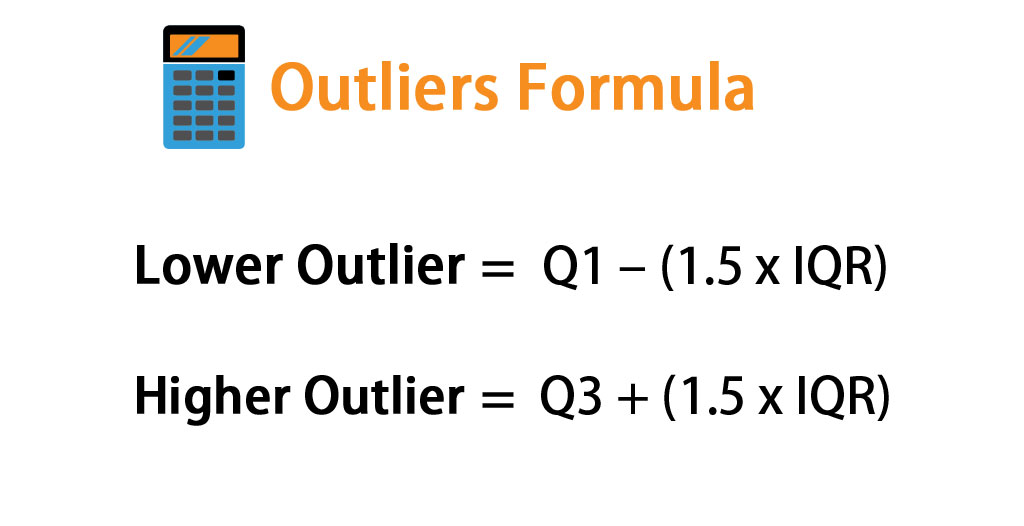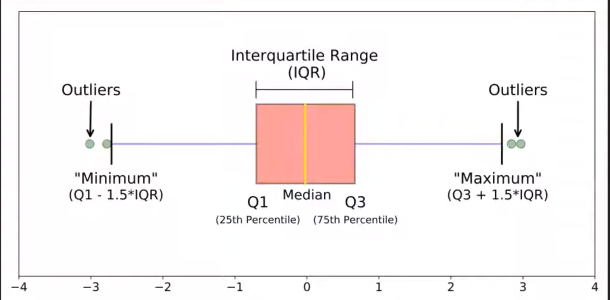

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("/content/placement.csv")
df.sample(5)

,cgpa,placement_exam_marks,placed
981,8.06,37.0,0
865,6.77,16.0,0
243,6.78,55.0,0
963,6.74,8.0,0
539,6.79,14.0,0


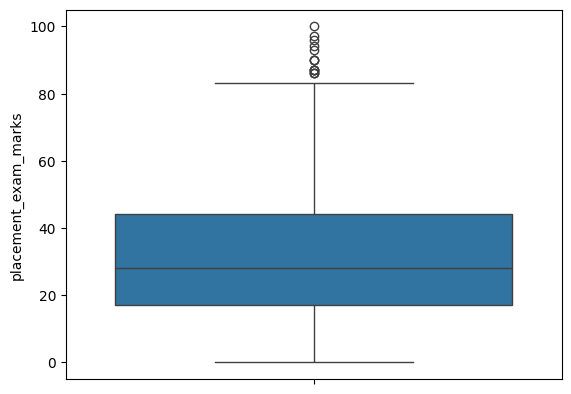

In [10]:
sns.boxplot(df['placement_exam_marks'])
plt.show()

In [19]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


In [21]:
Q1 = df['placement_exam_marks'].quantile(.25)
Q3 = df['placement_exam_marks'].quantile(.75)

IQR = Q3 - Q1


In [23]:
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

In [24]:
print(upper_limit)
print(lower_limit)

84.5
-23.5


# Trimming

In [32]:
df[(df['placement_exam_marks'] < lower_limit) | (df['placement_exam_marks'] > upper_limit)].shape

(15, 3)

In [30]:
new_df = df[(df['placement_exam_marks'] > lower_limit) & (df['placement_exam_marks'] < upper_limit)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


# Capping

In [34]:
df['placement_exam_marks'] = np.where(

    df['placement_exam_marks'] < lower_limit,

    lower_limit,

    np.where(
        df['placement_exam_marks'] > upper_limit,

        upper_limit,

        df['placement_exam_marks']
    )
)

In [35]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [37]:
# Outleirs Vanish

df[(df['placement_exam_marks'] < lower_limit) | (df['placement_exam_marks'] > upper_limit)]

,cgpa,placement_exam_marks,placed


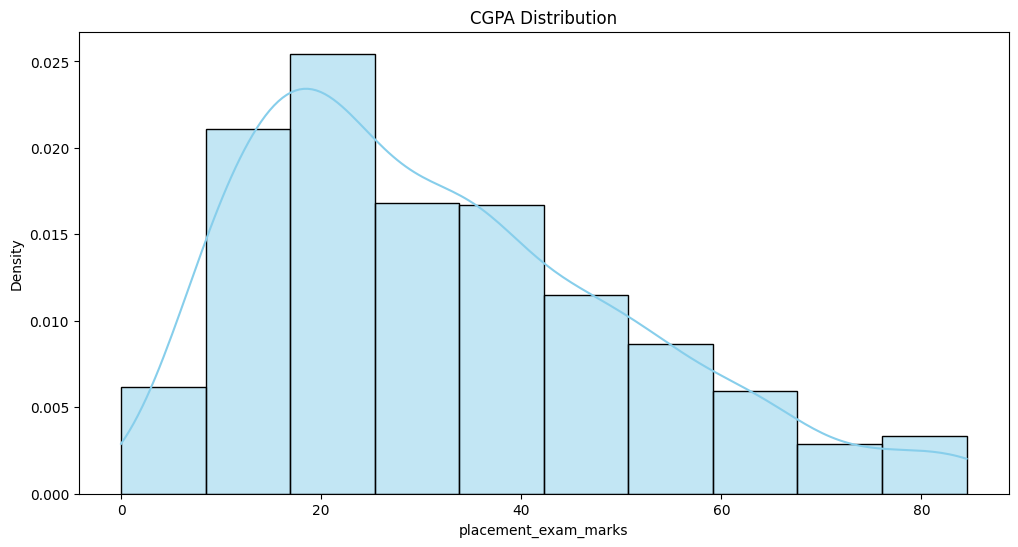

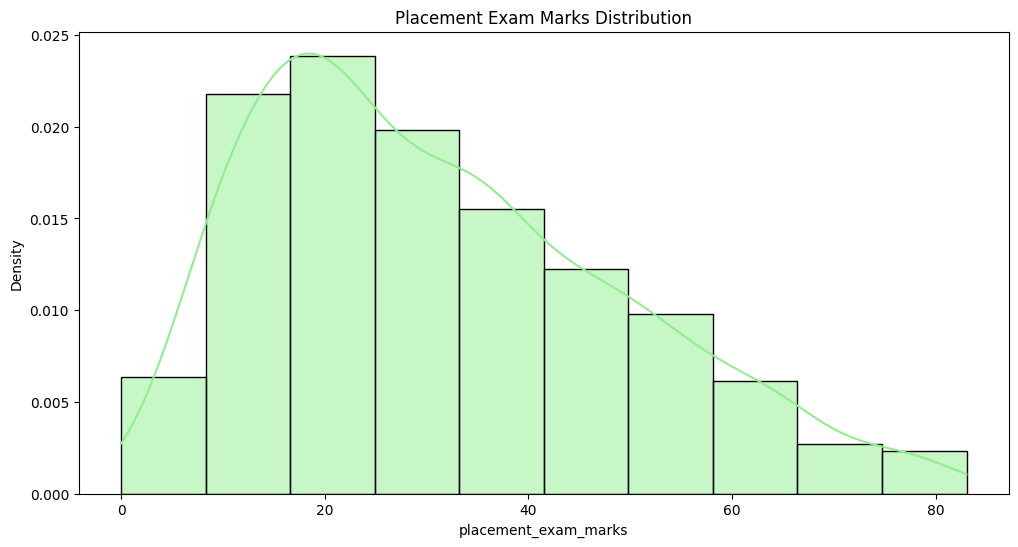

In [39]:

# Plot for 'cgpa'
plt.figure(figsize=(12,6))
sns.histplot(df['placement_exam_marks'], kde=True, stat="density", bins=10, color='skyblue')
plt.title("CGPA Distribution")
plt.show()

# Plot for 'placement_exam_marks'
plt.figure(figsize=(12,6))
sns.histplot(new_df['placement_exam_marks'], kde=True, stat="density", bins=10, color='lightgreen')
plt.title("Placement Exam Marks Distribution")
plt.show()
